In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


In [2]:
!python -m pip install word2number
from word2number import w2n
w2n.word_to_num("nine hundred ninety nine")

Defaulting to user installation because normal site-packages is not writeable


999

In [3]:
df=pd.read_csv("hiring.csv")

In [4]:
df.head(10)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [5]:
df.experience = df.experience.fillna("zero")
df.experience = df.experience.apply(w2n.word_to_num)

In [6]:
df['experience']

0     0
1     0
2     5
3     2
4     7
5     3
6    10
7    11
Name: experience, dtype: int64

In [7]:
df.head(10)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  8 non-null      int64  
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 388.0 bytes


In [9]:
df.describe()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
count,8.00000,7.000000,8.000000,8.00000
mean,4.75000,7.857143,7.875000,63000.00000
std,4.26782,1.345185,1.642081,11501.55269
min,0.00000,6.000000,6.000000,45000.00000
25%,1.50000,7.000000,6.750000,57500.00000
50%,4.00000,8.000000,7.500000,63500.00000
75%,7.75000,8.500000,9.250000,70500.00000
max,11.00000,10.000000,10.000000,80000.00000


In [10]:
df = df.rename(columns={"test_score(out of 10)": "test_score"})
df = df.rename(columns={"interview_score(out of 10)": "interview_score"})

In [11]:
df.describe()

,experience,test_score,interview_score,salary($)
count,8.00000,7.000000,8.000000,8.00000
mean,4.75000,7.857143,7.875000,63000.00000
std,4.26782,1.345185,1.642081,11501.55269
min,0.00000,6.000000,6.000000,45000.00000
25%,1.50000,7.000000,6.750000,57500.00000
50%,4.00000,8.000000,7.500000,63500.00000
75%,7.75000,8.500000,9.250000,70500.00000
max,11.00000,10.000000,10.000000,80000.00000


In [12]:
df.test_score = df.test_score.fillna(df.test_score.mode()[0])

In [13]:
df.head(10)

,experience,test_score,interview_score,salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [14]:
import matplotlib.pyplot as plt

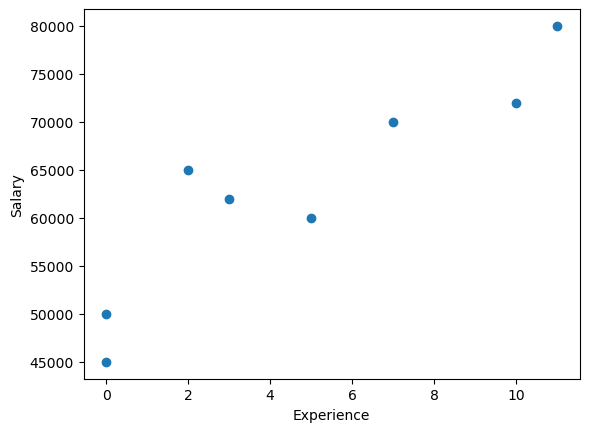

In [15]:
plt.scatter(df['experience'], df['salary($)'])
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
lr= LinearRegression()

In [18]:
lr.fit(df[['experience','test_score','interview_score']],df['salary($)'])

LinearRegression()

In [19]:
print(lr.coef_, lr.intercept_)

[2922.26901502 2221.30909959 2147.48256637] 14992.65144669314


In [20]:
lr.predict([[2,9,6]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
print("r2_score:",r2_score(df['salary($)'], lr.predict(df[['experience','test_score','interview_score']])))

r2_score: 0.9770139014273139


In [23]:
lr.score(df[['experience','test_score','interview_score']], df['salary($)'])

0.9770139014273139

In [24]:
print("mean_squared_error:", mean_squared_error(df['salary($)'], lr.predict(df[['experience','test_score','interview_score']])))

mean_squared_error: 2660640.9097884092


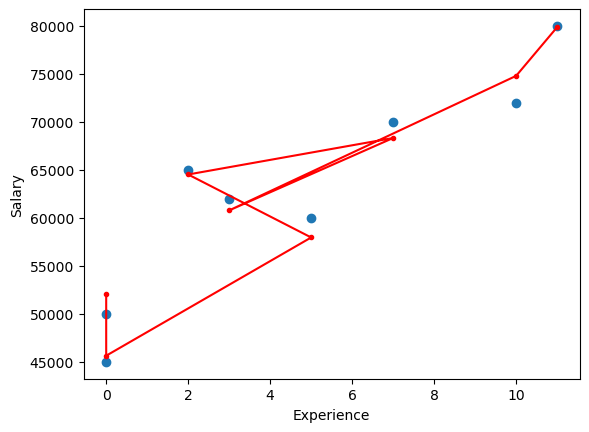

In [25]:
plt.scatter(df['experience'], df['salary($)'])
plt.plot(df['experience'], lr.predict(df[['experience','test_score','interview_score']]), color='red', marker='.')
plt.xlabel('Experience')    
plt.ylabel('Salary')
plt.show()

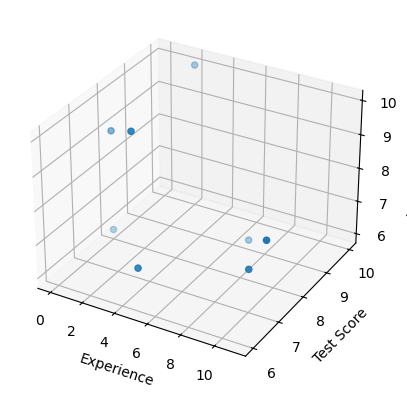

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['experience'], df['test_score'], df['interview_score'])
ax.set_xlabel('Experience')
ax.set_ylabel('Test Score')
ax.set_zlabel('interview_score')

plt.show()


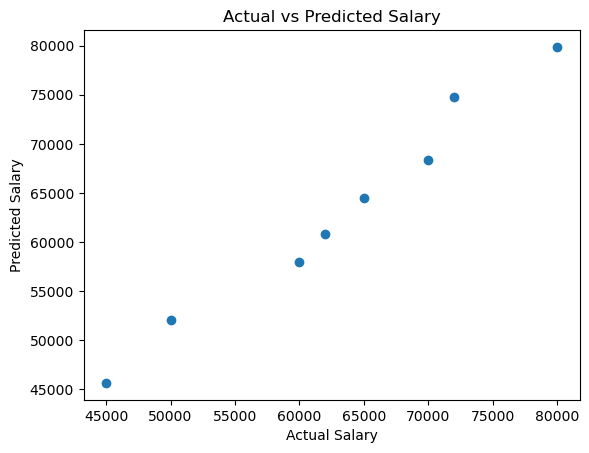

In [27]:
y_true = df['salary($)']
y_pred = lr.predict(df[['experience','test_score','interview_score']])

plt.scatter(y_true, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()


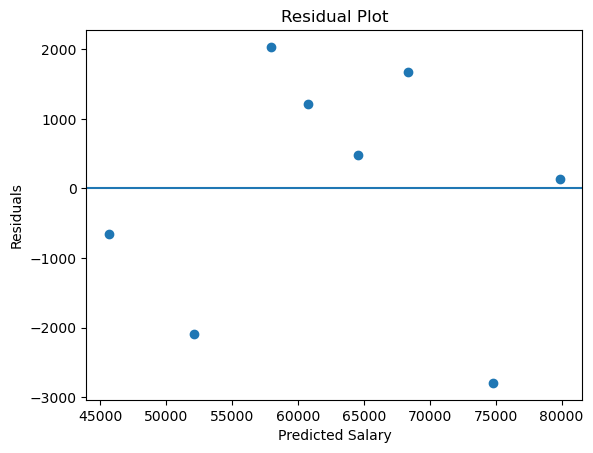

In [28]:
residuals = y_true - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
